<a href="https://www.kaggle.com/code/patrickstarrrr/deep-feedforward-networks-mlp-for-house-prices?scriptVersionId=123834198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center"> Hi, everyone!I propose my version of the solution to the proposed problem using Deep Feedforward Networks (MLP)

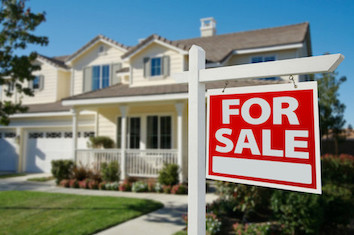

To start, take the data for our model:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

Сonsider the first few rows of our **train** and **test** dataset by calling the ***df.head()***:

In [2]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Now let's concatenate the two data sets for general processin by calling the ***pd.concat***:

In [4]:
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

Ok. Now let's see what types of columns are included in our DataFrame by calling the ***df.dtypes***:

In [5]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object


**Woow**! There are a lot of them!
Let's write a small algorithm that groups columns by types. \
Further we will work with each type separately:

In [6]:
types_dict = df.columns.to_series().groupby(df.dtypes).groups
{key.name: vol for key, vol in types_dict.items()}

{'int64': Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'SalePrice'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', '

Looks better! Now we are create a set of columns with **numerical** and **categorical** type of data:

In [7]:
num_col = []
name_col = []

for key, vol in types_dict.items():
    if key == 'int' or key == 'float':
        for col in range(len(vol)):
            num_col.append(vol[col])
    else:
        for col in range(len(vol)):
            name_col.append(vol[col])

Now check for **empty** values in numeric columns by using the construction  ***isna().sum()***:

In [8]:
print(df[num_col].isna().sum())

Id                  0
MSSubClass          0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
LotFrontage       486
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
BsmtFullBath        2
BsmtHalfBath        2
GarageYrBlt       159
GarageCars          1
GarageArea          1
SalePrice        1459
dtype: int64


Empty values in **'SalePrice'** - it's test set, so let's leave it. \
Turn the **'GarageYrBlt'** column into a categorical one with options **1/0**, where 1 - there is a availability of a garage, 0 - no garage. \
Empty values of **'MasVnrArea'** will be replaced by the average value of the column. \
In all other cases, due to the small number of gaps, replace the empty values with 0 by calling the ***df.fillna(0)***:

In [9]:
df.GarageYrBlt.loc[~df.GarageYrBlt.isnull()] = 1
df.GarageYrBlt.loc[df.GarageYrBlt.isnull()] = 0

df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.mean())
df[num_col] = df[num_col].fillna(0)

Ok, now we are build a correlation matrix of numerical factors to find and exclude duplicate indicators with high correlation:

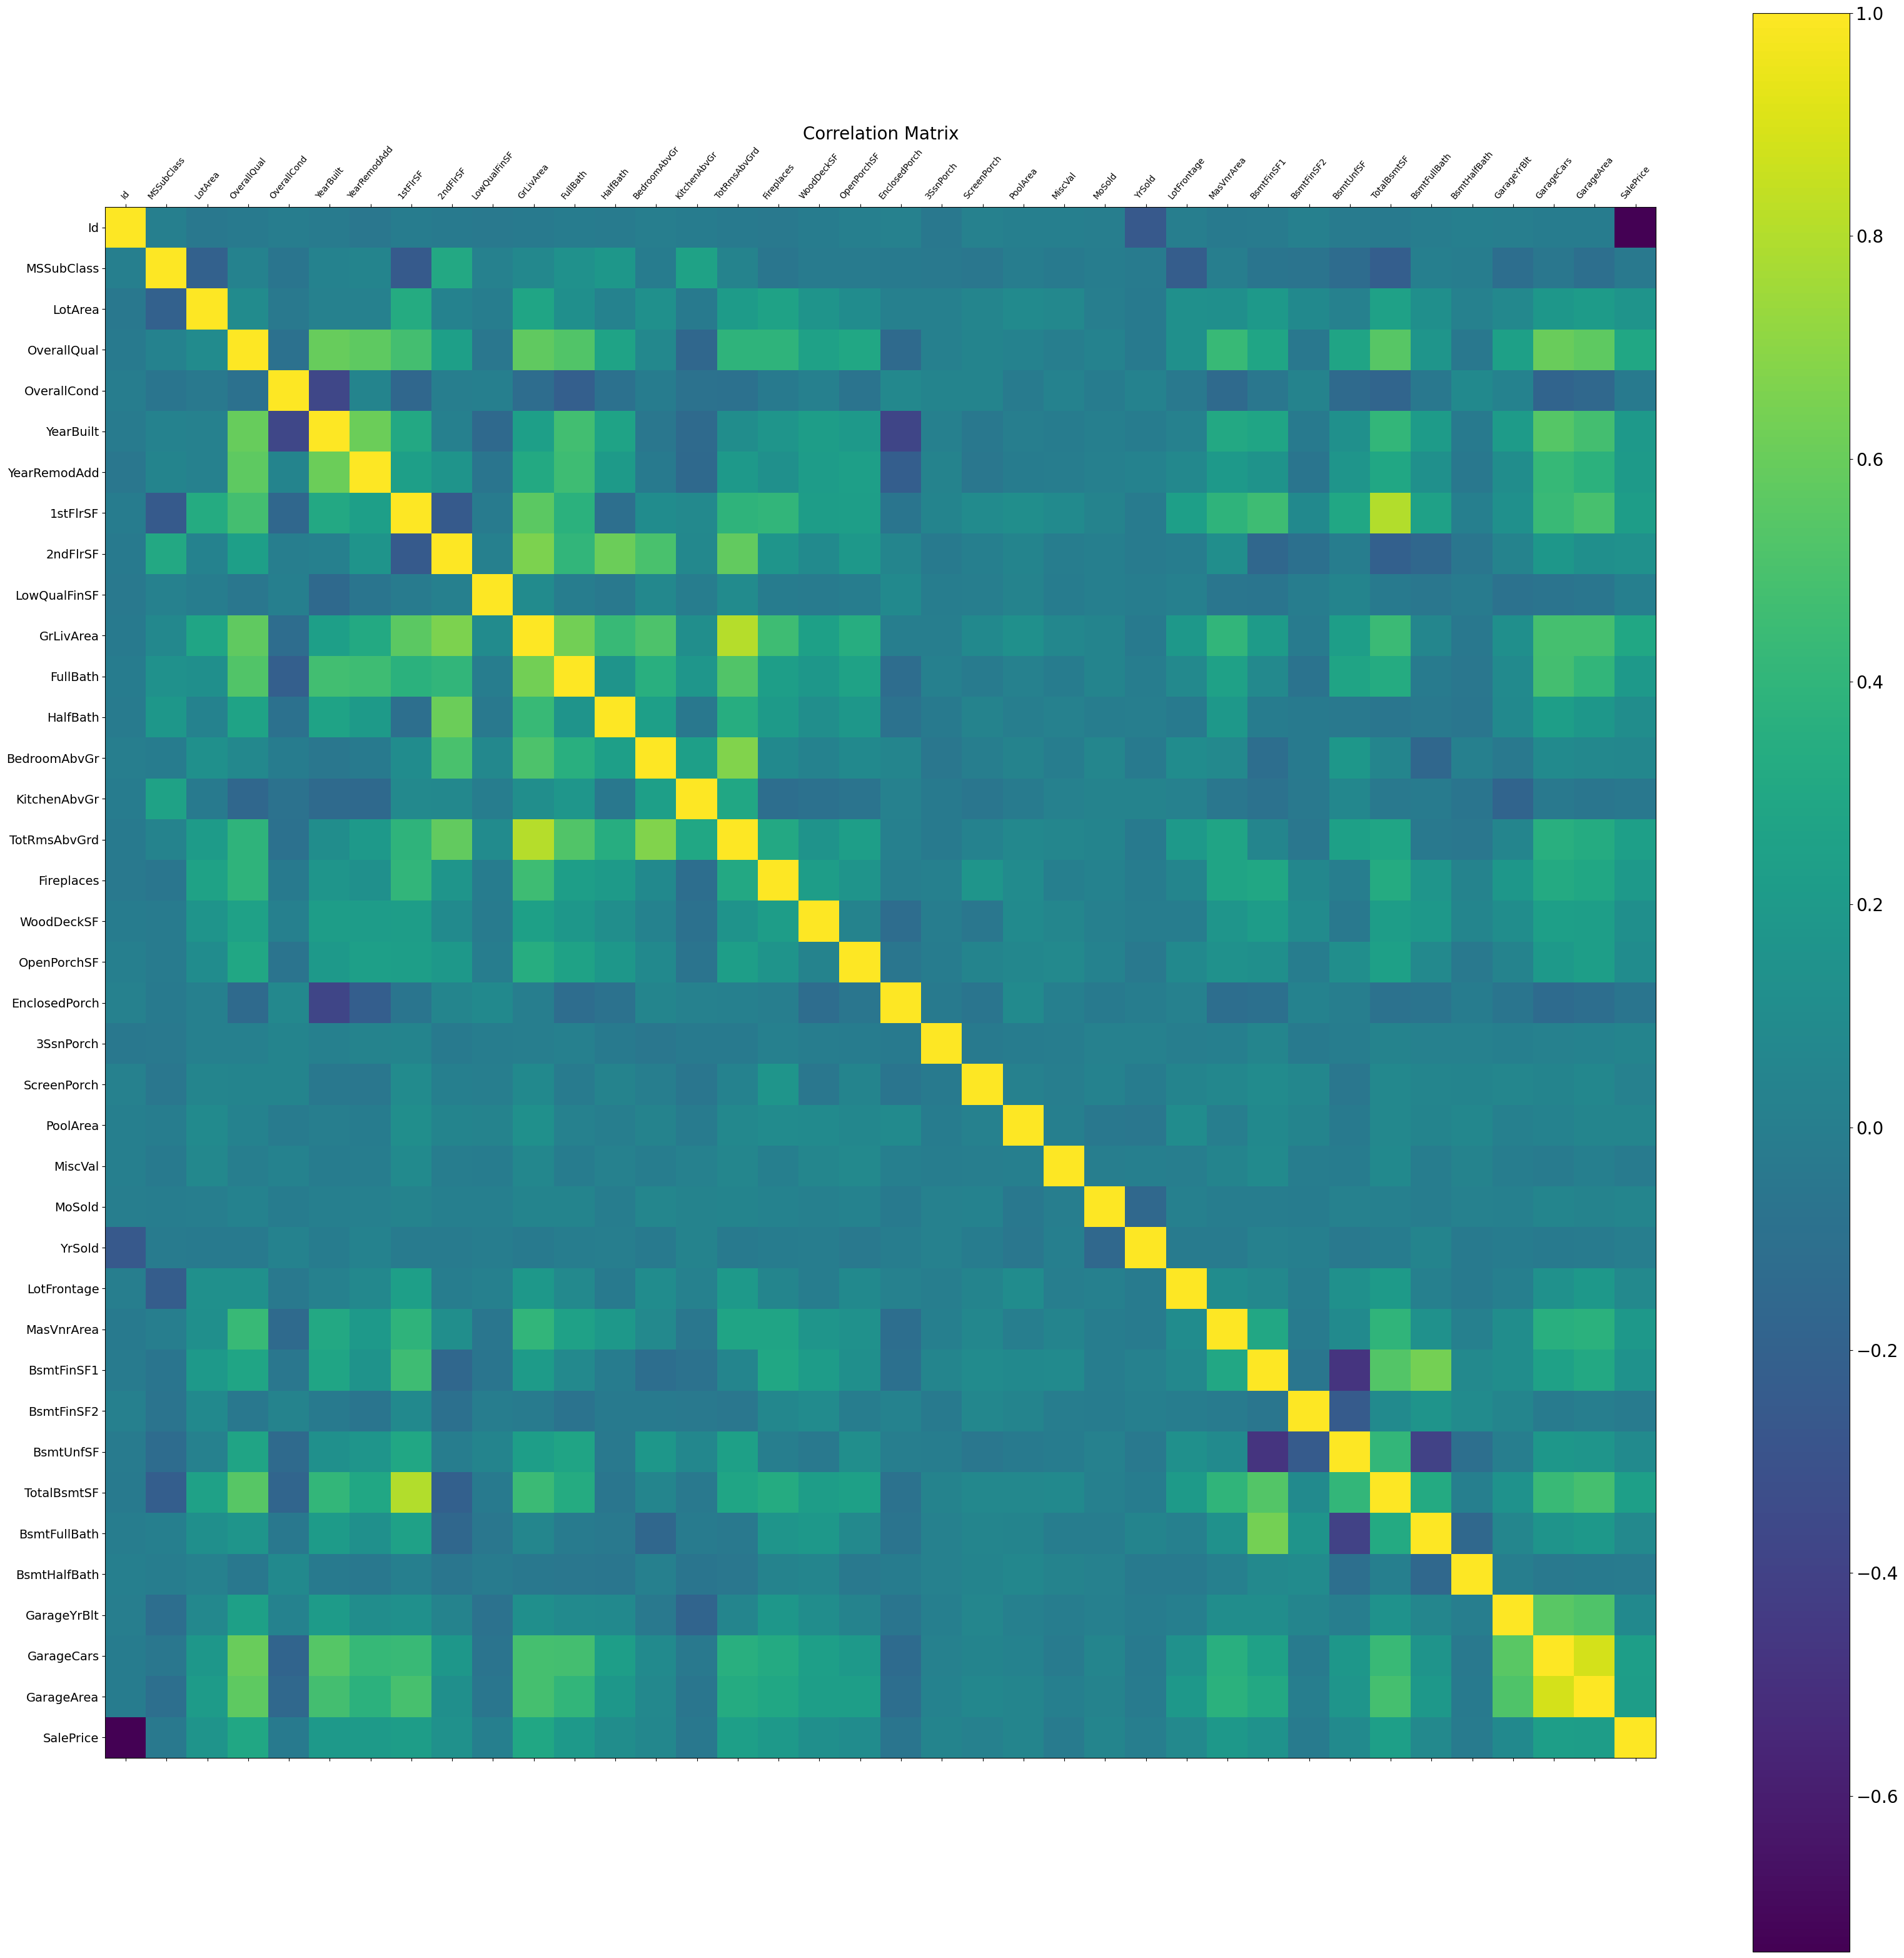

In [10]:
from matplotlib import pyplot as plt 

f = plt.figure(figsize=(40, 40))
plt.matshow(df[num_col].corr(), fignum=f.number)
plt.xticks(range(df[num_col].select_dtypes(['number']).shape[1]), df[num_col].select_dtypes(['number']).columns, fontsize=10, rotation=50)
plt.yticks(range(df[num_col].select_dtypes(['number']).shape[1]), df[num_col].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 20)
plt.title('Correlation Matrix', fontsize=20);

Drop uninformative column **'Id'** and indicators that have a high direct and inverse correlation: \
**'1stFlrSF'**, **'2ndFlrSF'** -> drop **'2ndFlrSF'** \
**'GarageCars'**, **'GarageArea'** -> drop **'GarageCars'** \
**'BsmtFinSF1'**, **'BsmtFinSF2'**, **'BsmtUnfSF'**, **'BsmtFullBath'** -> drop **'BsmtFinSF1'**, **'BsmtFinSF2'**, **'BsmtFullBath'**

In [11]:
df = df.drop(['Id'], axis=1)
df = df.drop(['BsmtFinSF1'], axis=1)
df = df.drop(['BsmtFinSF2'], axis=1)
df = df.drop(['BsmtFullBath'], axis=1)
df = df.drop(['GarageCars'], axis=1)
df = df.drop(['2ndFlrSF'], axis=1)

Сreate a new list of numeric columns:

In [12]:
types_dict = df.columns.to_series().groupby(df.dtypes).groups

num_col = []

for key, vol in types_dict.items():
    if key == 'int' or key == 'float':
        for col in range(len(vol)):
            num_col.append(vol[col])

Now look again at the correlation matrix of the remaining features:

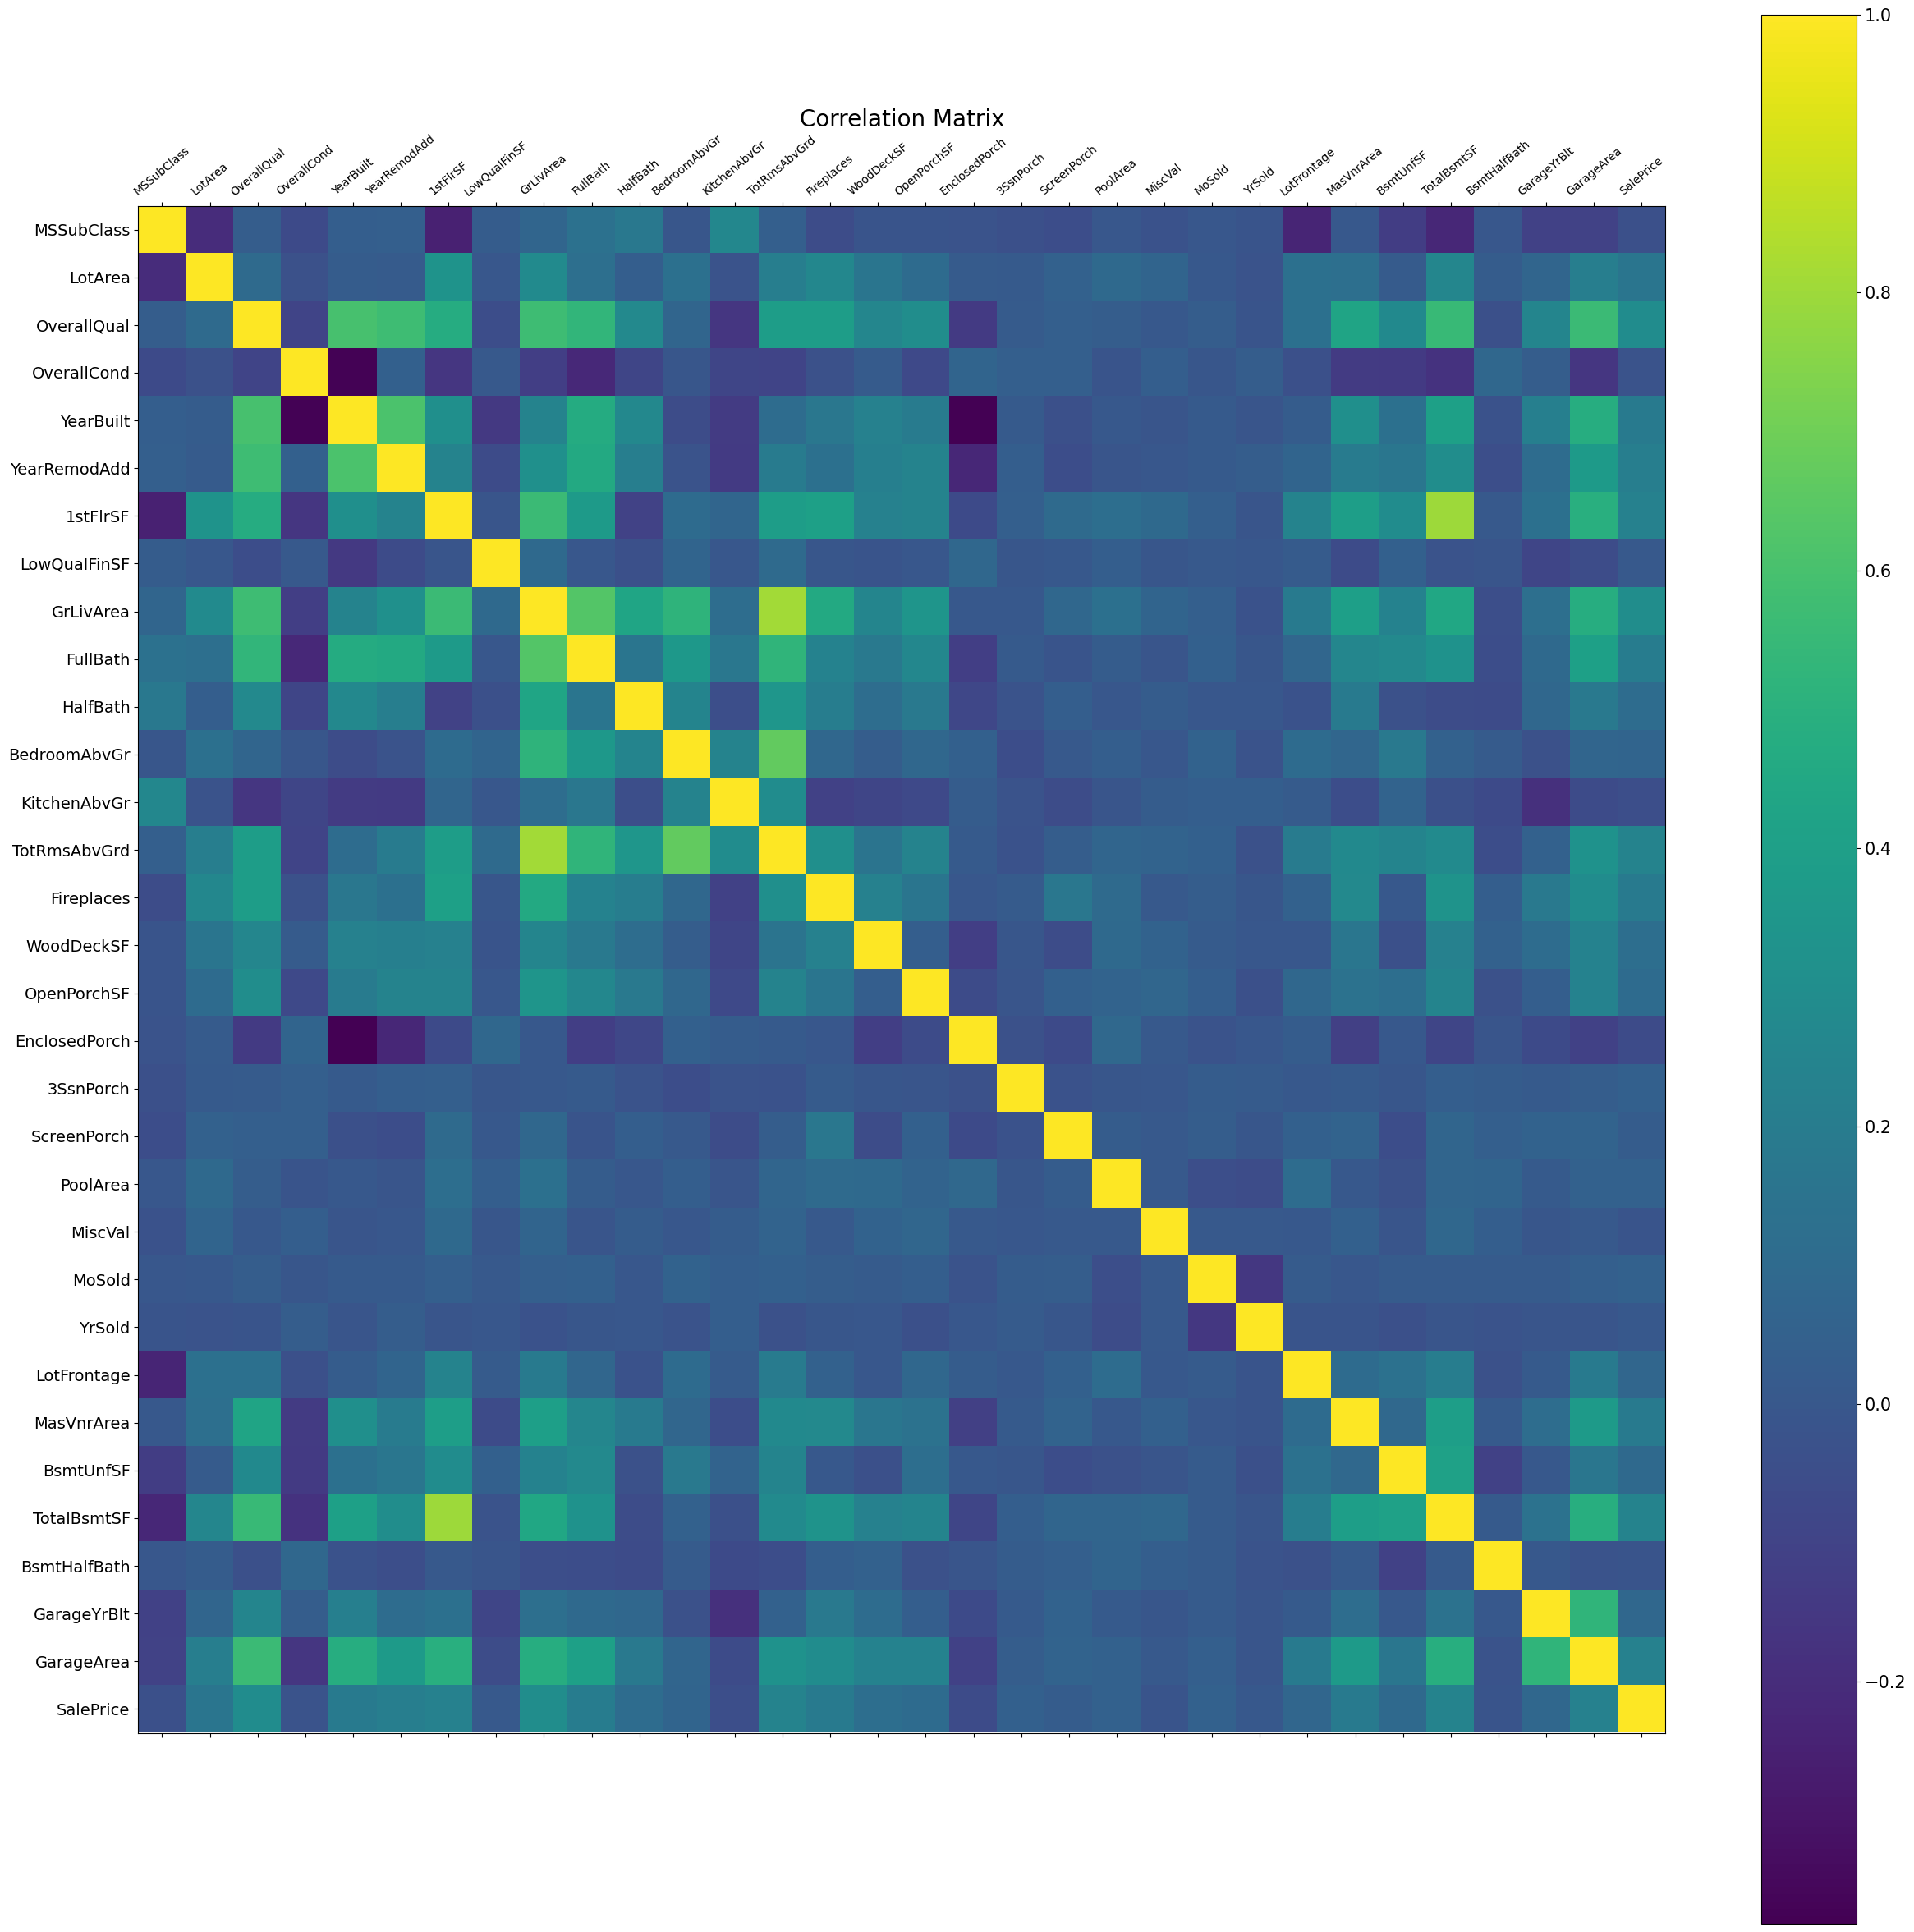

In [13]:
from matplotlib import pyplot as plt 

f = plt.figure(figsize=(30, 30))
plt.matshow(df[num_col].corr(), fignum=f.number)
plt.xticks(range(df[num_col].select_dtypes(['number']).shape[1]), df[num_col].select_dtypes(['number']).columns, fontsize=10, rotation=40)
plt.yticks(range(df[num_col].select_dtypes(['number']).shape[1]), df[num_col].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 15)
plt.title('Correlation Matrix', fontsize = 20);

Looks much better! Leave the columns **'YearBuilt'**, **'OverallQual'** and **'YearRemodAdd'** although we see they have a high connection \
Let's check the data for outliers right away. In such a large dataset, there may still be outliers that can skew our model:

In [14]:
df[num_col].iloc[:,:].describe().applymap(lambda x: f"{x:0.3f}")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,LowQualFinSF,GrLivArea,FullBath,...,MoSold,YrSold,LotFrontage,MasVnrArea,BsmtUnfSF,TotalBsmtSF,BsmtHalfBath,GarageYrBlt,GarageArea,SalePrice
count,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,...,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000
mean,57.138,10168.114,6.089,5.565,1971.313,1984.264,1159.582,4.694,1500.760,1.568,...,6.213,2007.793,57.767,102.201,560.580,1051.417,0.061,0.946,472.713,90491.588
std,42.518,7886.996,1.410,1.113,30.291,20.894,392.362,46.397,506.051,0.553,...,2.715,1.315,33.482,178.626,439.591,441.120,0.246,0.227,215.536,106496.379
min,20.000,1300.000,1.000,1.000,1872.000,1950.000,334.000,0.000,334.000,0.000,...,1.000,2006.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20.000,7478.000,5.000,5.000,1953.500,1965.000,876.000,0.000,1126.000,1.000,...,4.000,2007.000,43.000,0.000,220.000,793.000,0.000,1.000,320.000,0.000
50%,50.000,9453.000,6.000,5.000,1973.000,1993.000,1082.000,0.000,1444.000,2.000,...,6.000,2008.000,63.000,0.000,467.000,989.000,0.000,1.000,480.000,34900.000
75%,70.000,11570.000,7.000,6.000,2001.000,2004.000,1387.500,0.000,1743.500,2.000,...,8.000,2009.000,78.000,163.500,805.000,1302.000,0.000,1.000,576.000,163000.000
max,190.000,215245.000,10.000,9.000,2010.000,2010.000,5095.000,1064.000,5642.000,4.000,...,12.000,2010.000,313.000,1600.000,2336.000,6110.000,2.000,1.000,1488.000,755000.000


It looks vso scary **:)** \
Although if you look closely at the table, everything seems to be fine, although there are indicators that are filled with 0 in the absence (for example, the year the garage was built) \
Let's visualize our data so we can see strange things better by using the ***seaborn***:

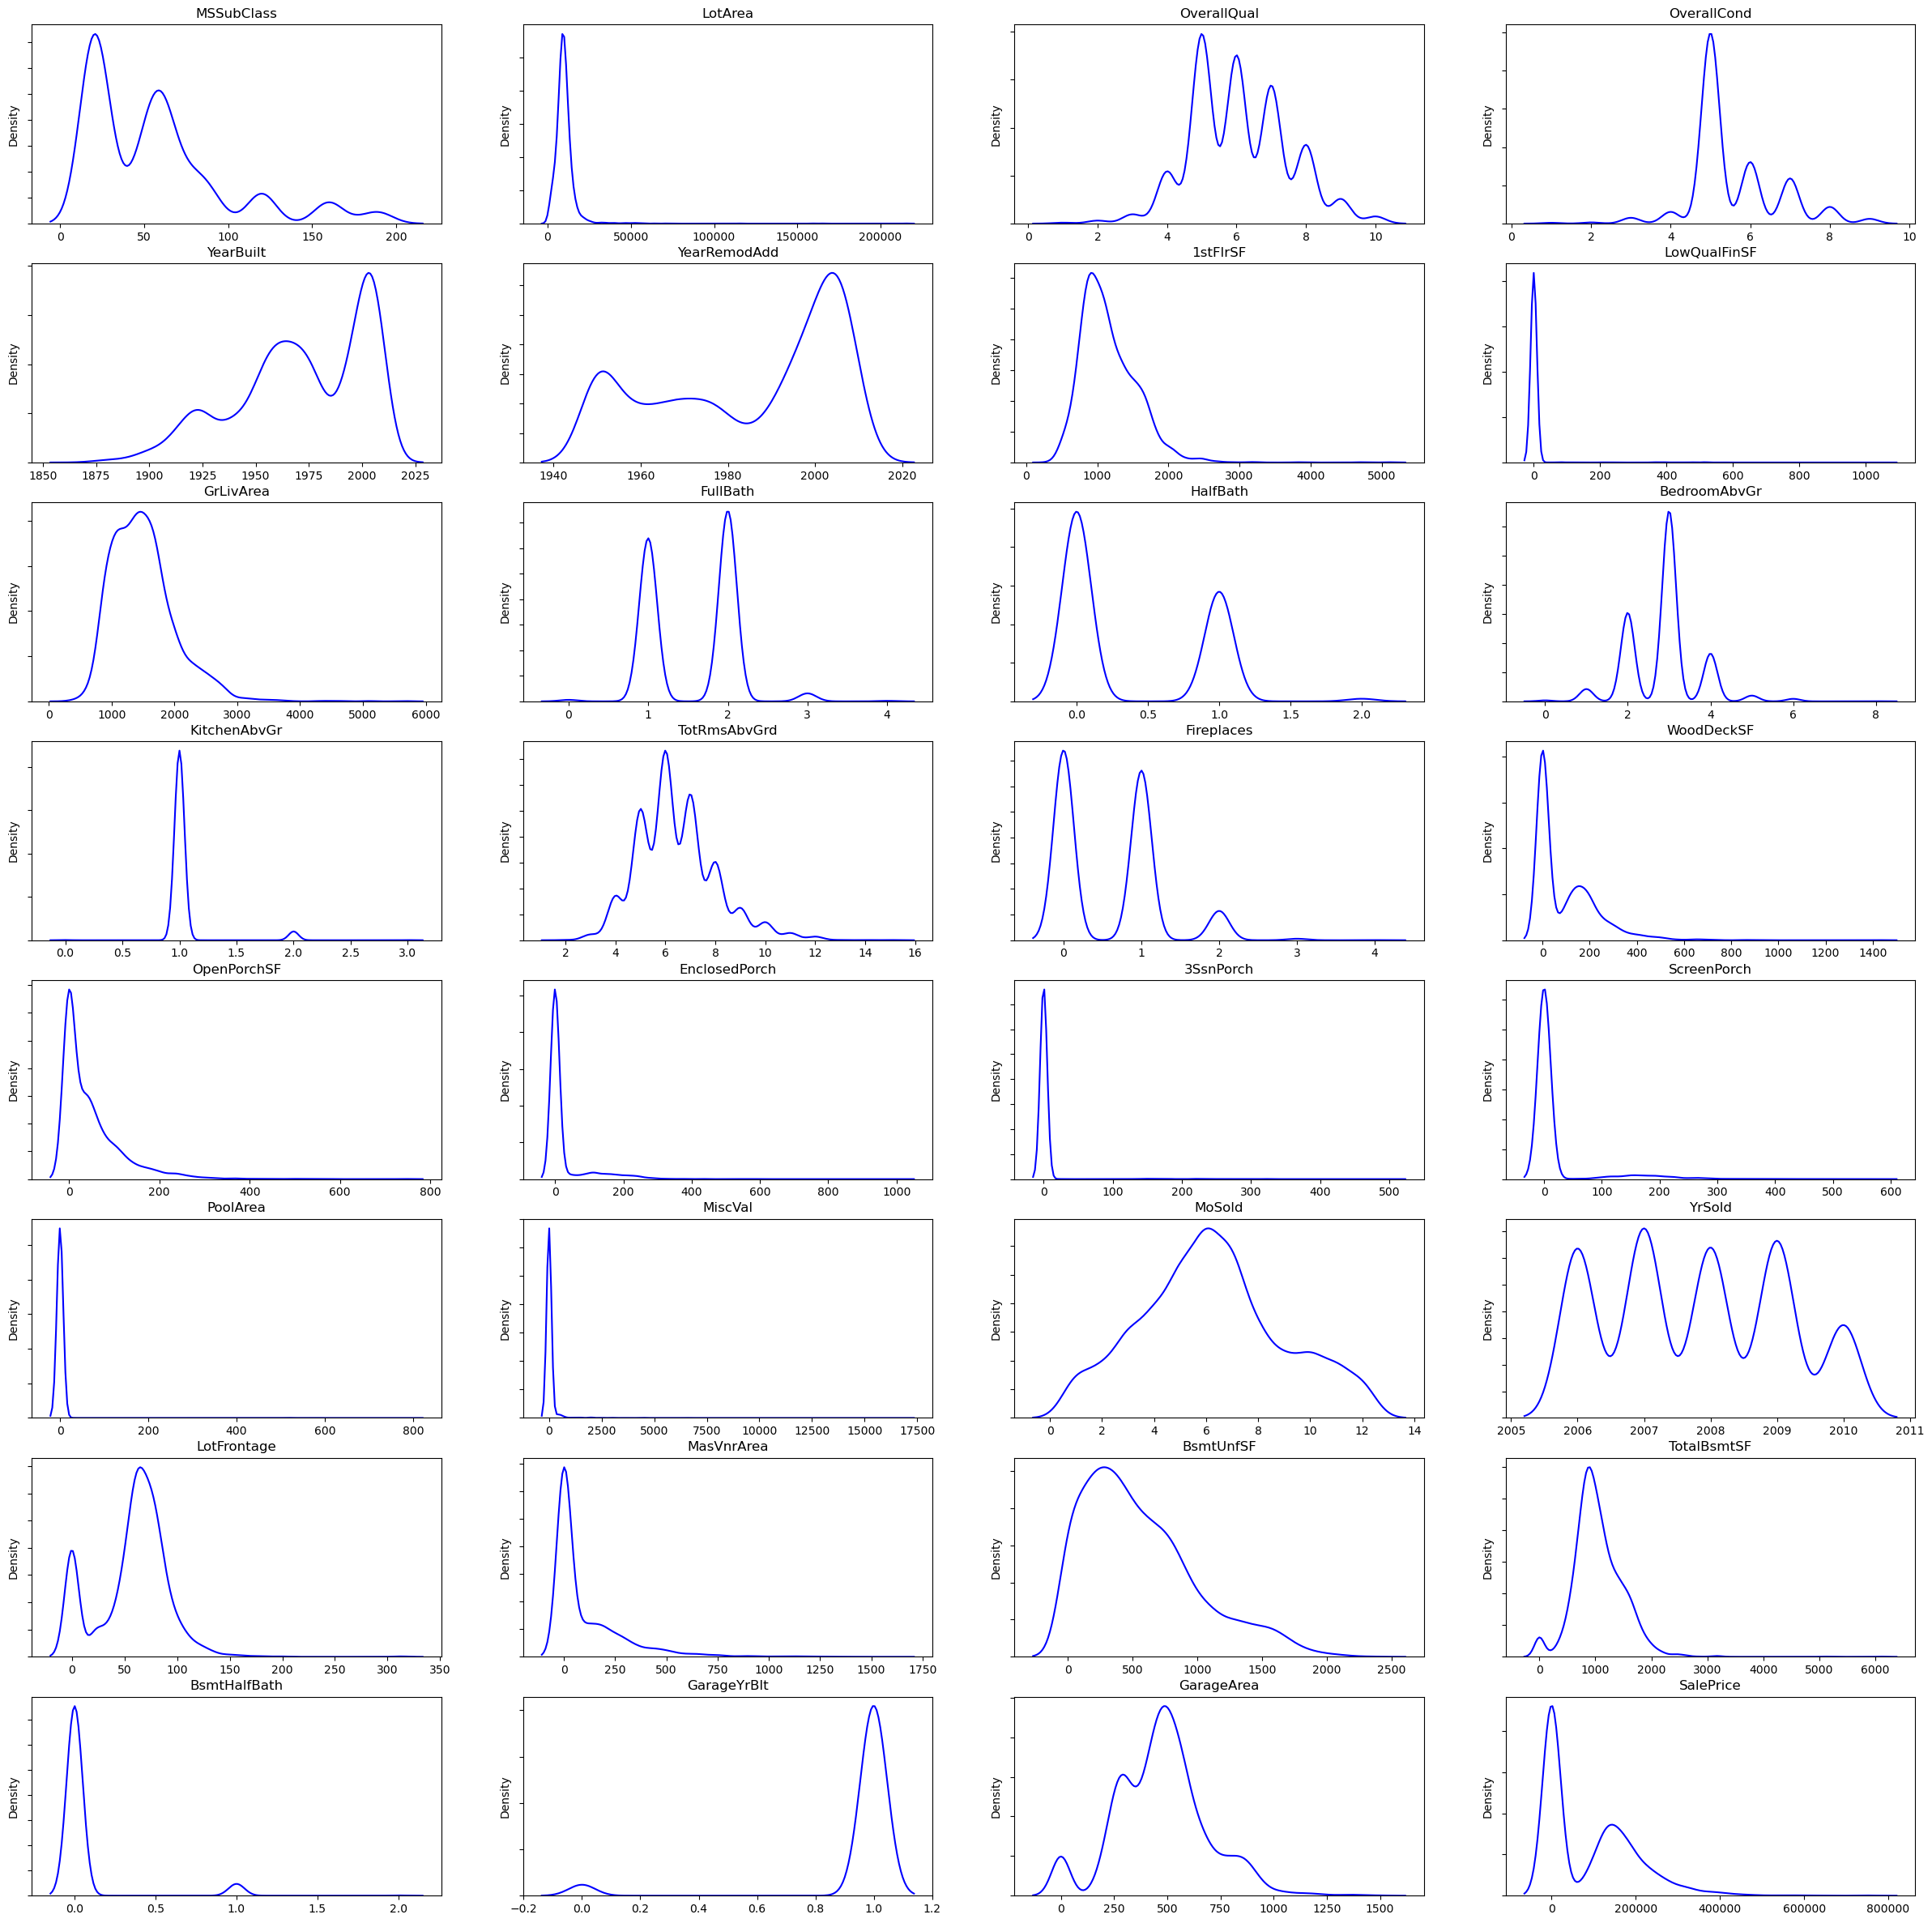

In [15]:
import seaborn as sns

# create a subplot of 8 x 4
plt.subplots(8, 4, figsize = (30, 30))

# Plot a density plot for each variable
for idx, col in enumerate(num_col):
    ax = plt.subplot(8, 4, idx + 1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df[col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-', 'color':'blue', 'label':"No Diabetes"})
    ax.set_title(col)

plt.show()

Ooops! I have questions for some lines! \
Look at suspicious outliers and exclude them if they are included **only in the training set**:

In [16]:
num_col_ = ['LotArea', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
 'PoolArea', 'MiscVal', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'SalePrice']

Now we are drop outliers from the training sample for some indicators:

In [17]:
import numpy as np

index_drop = np.array([])

index_drop = np.unique(np.concatenate((
    np.concatenate((
        np.concatenate((
            np.concatenate((
                np.concatenate((
                    np.concatenate((
                        np.concatenate((
                            np.concatenate((
                                np.concatenate((index_drop, df[df['LotArea'] > 30000].index.values)),
                                df[df['1stFlrSF'] > 3000].index.values)),
                            df[df['GrLivArea'] > 4000].index.values)),
                        df[df['WoodDeckSF'] > 600].index.values)),
                    df[df['LotFrontage'] > 200].index.values)),
                df[df['OpenPorchSF'] > 400].index.values)),
            df[df['MasVnrArea'] > 1000].index.values)),
        df[df['TotalBsmtSF'] > 3000].index.values)), 
    df[df['SalePrice'] > 500000].index.values)))

index_drop = index_drop[index_drop < np.max(df_train.index)]
df = df.drop(index = index_drop)

Similarly to the **'GarageYrBlt'** column, we will convert the remaining 'suspicious' indicators into a categorical type with options 1/0, where 1 is a value greater than 1, 0 - otherwise:

In [18]:
for col in ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
           'ScreenPorch', 'PoolArea', 'MiscVal', 'LowQualFinSF']:
    
    df[col].loc[df[col] > 1] = 1
    df[col].loc[df[col] < 1] = 0

Now let's see how our 'suspicious' indicators have changed:

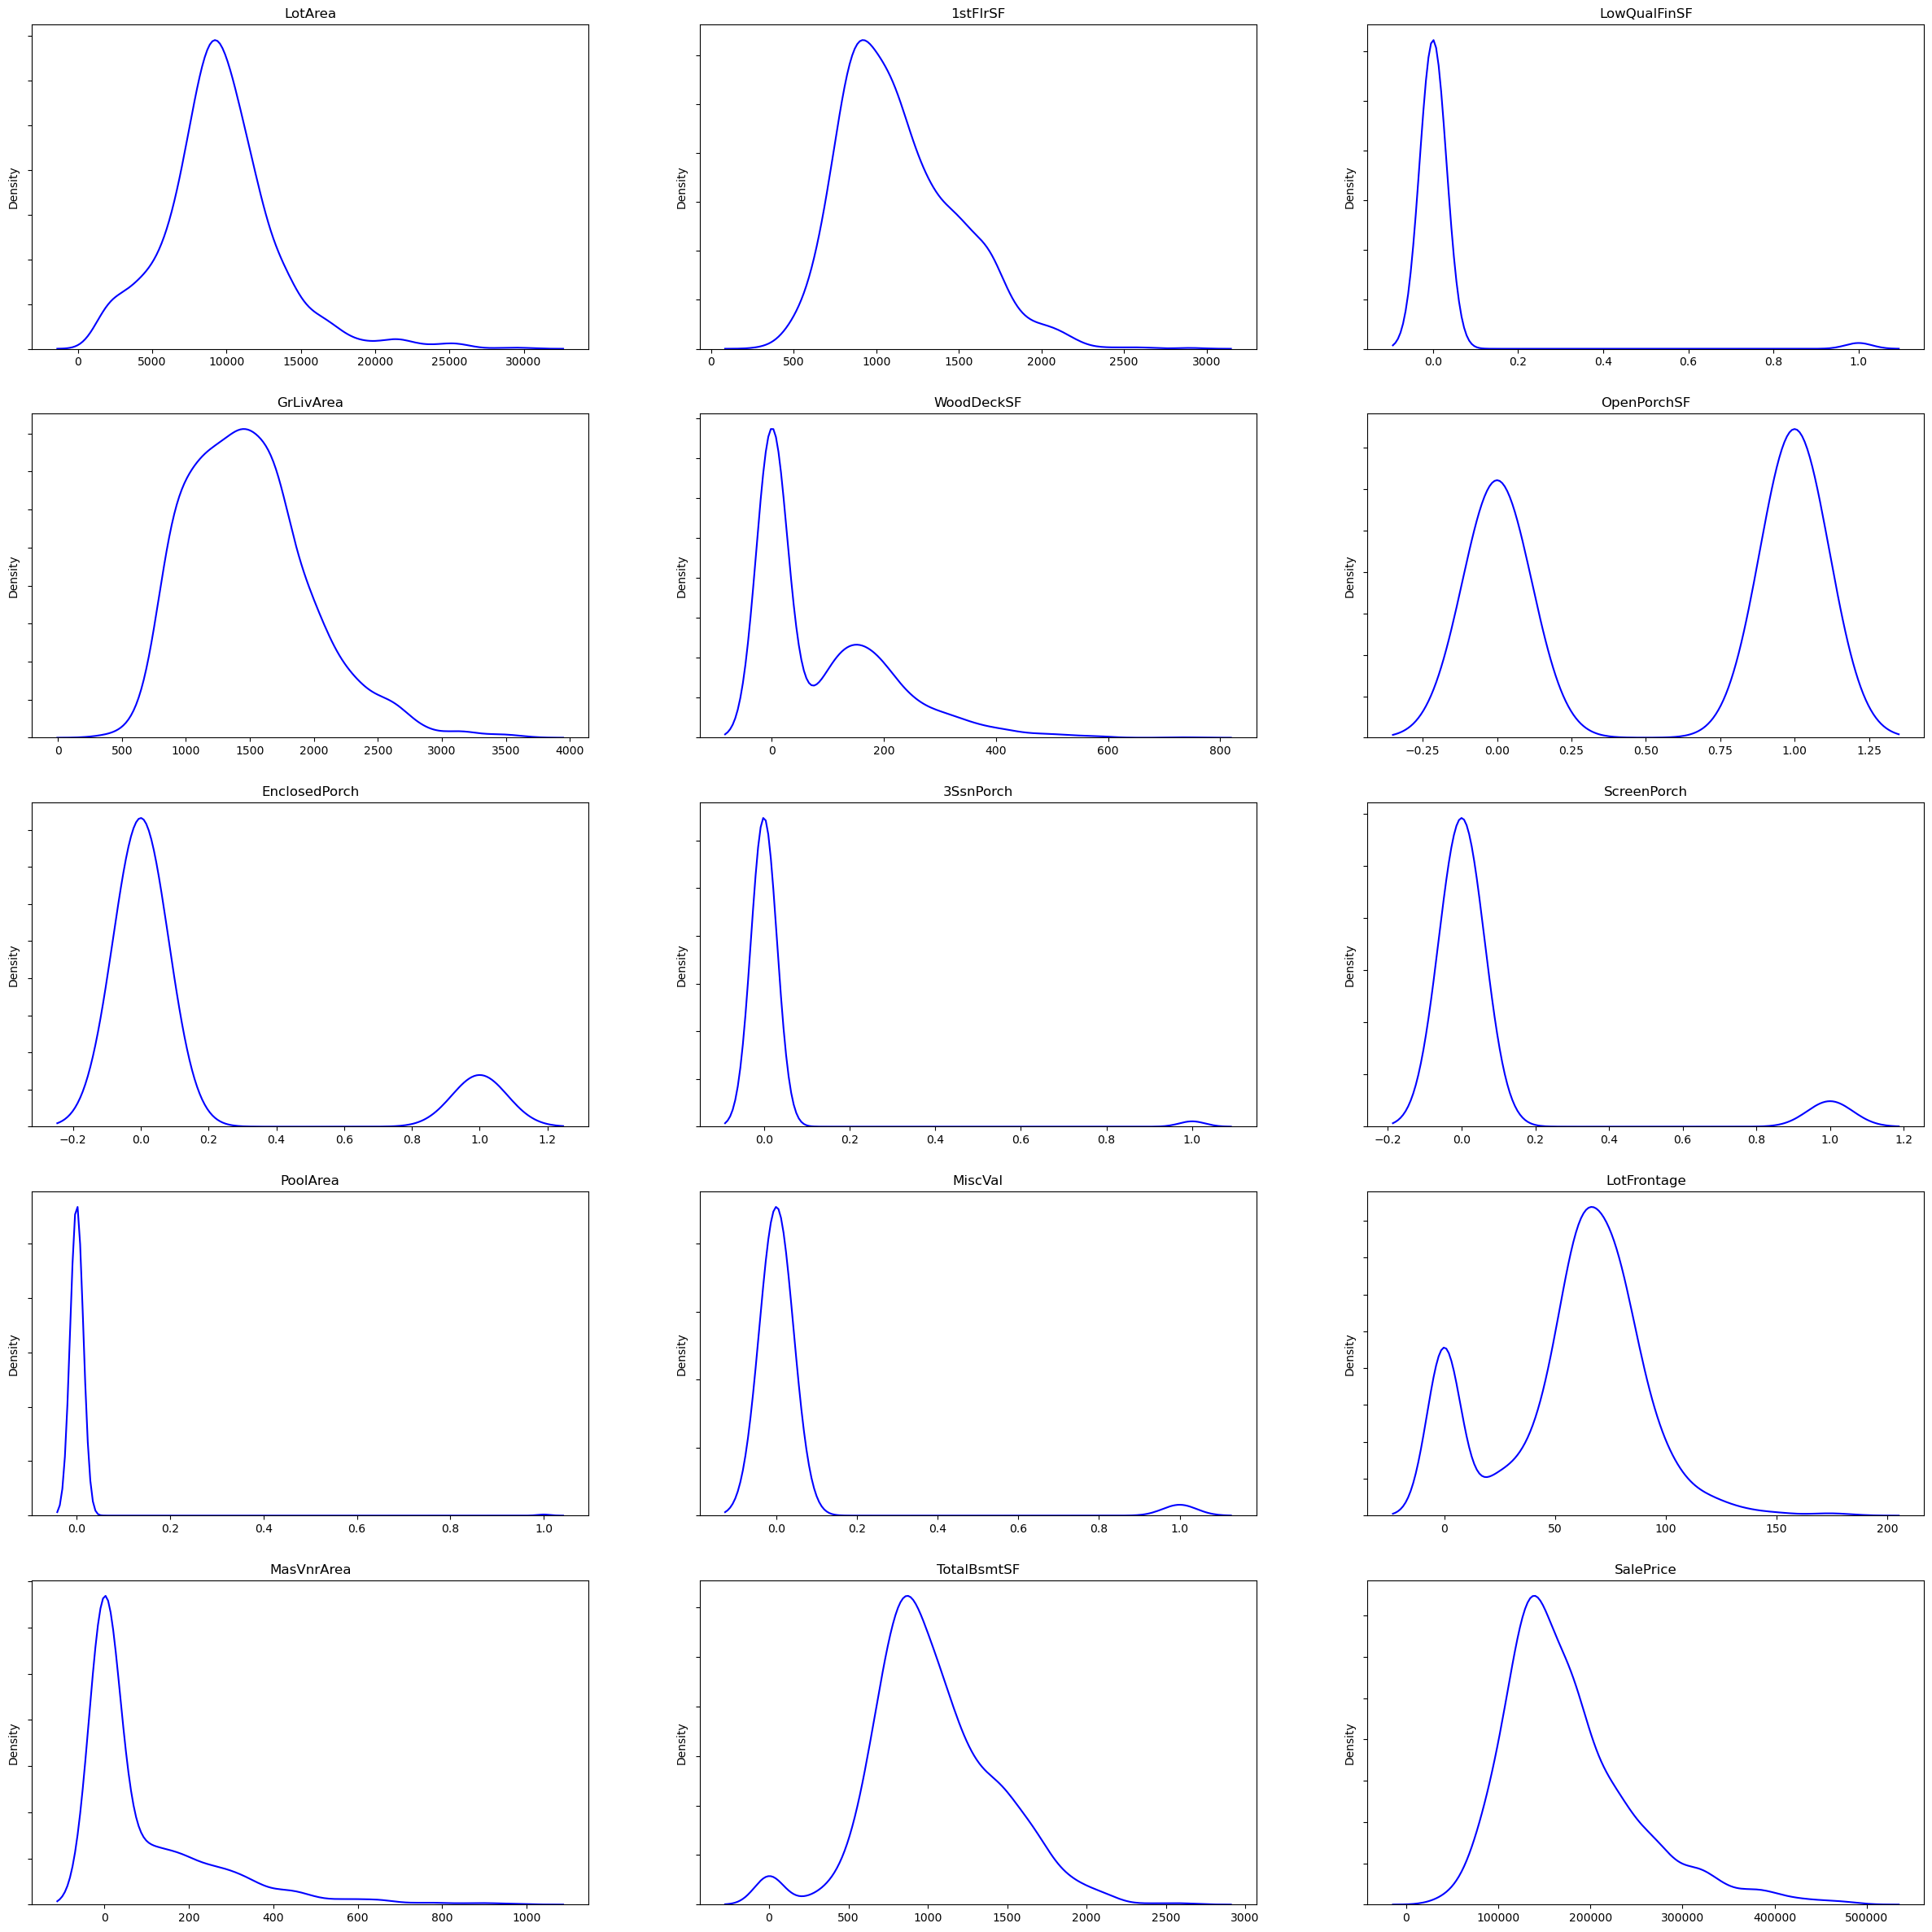

In [19]:
# create a subplot of 8 x 4
plt.subplots(5, 3, figsize = (30, 30))

# Plot a density plot for each variable
for idx, col in enumerate(num_col_):
    ax = plt.subplot(5, 3, idx + 1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.iloc[:len(df_train) - len(index_drop)][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-', 'color':'blue', 'label':"No Diabetes"})
    ax.set_title(col)

plt.show()

**Great**! Looks so much better. It is important that after all this we lost just a few lines together and our data is still complete! \
\
Now let's look at the columns with **categorical** indicators. First check for empty values in name columns:

In [20]:
print(df[name_col].isna().sum())

MSZoning            4
Street              0
Alley            2680
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       79
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1417
GarageType        156
GarageFinish      158
GarageQual        158
GarageCond        158
PavedDrive          0
PoolQC           2867
Fence            2310
MiscFeature      2774
SaleType            1
SaleCondition       0
dtype: int64


Wow, a lot of empty ones \
Since, judging by the description, empty values mean the absence of a feature, so we will just replace the empty values for all columns with **'No'**:

In [21]:
df[name_col] = df[name_col].fillna('No')

Now for train our model split the **categorical** columns into dummy variables:

In [22]:
new_name_columns = pd.get_dummies(df[name_col], columns = name_col).columns
df = pd.get_dummies(data = df, columns=name_col)

Ok, now we are prepare the training set by including all the remaining data from the training set \
I will standardize **all** columns except cost, **including dummy** variables and columns where we changed the value to 0/1 \
I will store the mean and standard deviation on the training set so that I can apply the same values later when standardizing the test set for predict:

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np

df_scaled_train = df.iloc[:(len(df_train) - len(index_drop)),:].copy()
df_scaled_train = df_scaled_train.drop(['SalePrice'], axis=1)

scaler = StandardScaler()

cols = df_scaled_train.columns.tolist()
df_scaled_train = scaler.fit_transform(df_scaled_train)
df_scaled_train = pd.DataFrame(df_scaled_train, columns=cols, index=df.iloc[:(len(df_train) - len(index_drop)),:].index)
df_scaled_train = pd.concat([df_scaled_train, df['SalePrice'].iloc[:(len(df_train) - len(index_drop))]], axis=1)

Now we are split the train DataFrame into the training features (X) and the target variable that we're trying to predict (y):

In [24]:
X = df_scaled_train.loc[:, df_scaled_train.columns != 'SalePrice']
y = df_scaled_train.loc[:, 'SalePrice']

Next, let's build our neural network architecture:

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation= 'relu', input_dim = X.shape[1]))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

Now we verify the structure of our model:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               77824     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 119,505
Trainable params: 119,505
Non-trainable params: 0
_________________________________________________________________


Finally, we compile and train our neural network:

In [27]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X, y, epochs=200)

Epoch 1/200
45/45 [==============================] - 1s 3ms/step - loss: 36186501120.0000 - mse: 36186501120.0000
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 35192602624.0000 - mse: 35192602624.0000
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 24368082944.0000 - mse: 24368082944.0000
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 6845232128.0000 - mse: 6845232128.0000
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 2896907520.0000 - mse: 2896907520.0000
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 1773442048.0000 - mse: 1773442048.0000
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 1427385984.0000 - mse: 1427385984.0000
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 1211402368.0000 - mse: 1211402368.0000
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 1048848960.0000 - mse: 10

It was a looooong list! \
But if you've read it, then you're wondering how it all ended **:)** \
Let's conclude the results by calculating the **RMSE** for the entire training and testing set:

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_pred = model.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))

45/45 [==============================] - 0s 2ms/step
Train RMSE: 5281.57


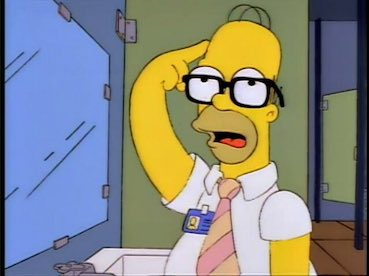

It looks very good! **The error is so low** by train! \
But you need to be careful not to overtrain the model, so it’s better not to overdo it with the number of epochs (200 is already quite a lot) \
Now apply our model on the test set:

In [29]:
df_scaled_test = df.iloc[(len(df_train) - len(index_drop)):,:].copy()
df_scaled_test = df_scaled_test.drop(['SalePrice'], axis = 1)
cols = df_scaled_test.columns.tolist()
df_scaled_test = scaler.transform(df_scaled_test)
df_scaled_test = pd.DataFrame(df_scaled_test, columns = cols, index = df.iloc[(len(df_train) - len(index_drop)):,:].index)

X_test = df_scaled_test

**hoooray!** we are almost done, it remains only to save the results:

In [30]:
test_pred_final = model.predict(X_test)

fin_res = pd.DataFrame(df_test['Id'].copy())
fin_res['SalePrice'] = test_pred_final

fin_res.to_csv('final_pred.csv',index=False)

fin_res

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,118166.429688
1,1462,150857.687500
2,1463,208995.609375
3,1464,206115.093750
4,1465,168909.031250
...,...,...
1454,2915,89158.304688
1455,2916,52212.628906
1456,2917,207512.625000
1457,2918,102674.937500


<div align="center"> Congratulations! We built not so bad model of Deep Feedforward Networks and applied it on the test sample, getting relatively good results! Thanks for interest to my Notebook!